## MATH 4388: Machine Learning Methods 


### Chapter 4: Training Models 

### Overview 

* Linear regression: Problem formulation, assumption, loss function, gradient
* Normal equation
* Sklearn implementation
* Evaluation metrics
* Gradient descent (GD) and variants
* Nonlinear extension and regularization 
* Logistic regression

### Case study: univariate linear regression

<hr style="border:2px solid gray">
   
* Training data: $\mathcal{D}=\{(x_n,y_n)\}_{n=1}^N$

* Parametric model: $f(x)=\theta_0+\theta_1 x$

* Objective: Choose $\theta_0,\theta_1$ such that $f(x_n)$ is close to $y_n$ 

* Mean squared error (MSE): 

$$\mathcal{L}(\theta_0, \theta_1)=\frac{1}{N}\sum_{n=1}^N \big(y_n - f(x_n)\big)^2$$



### Solving the optimization problem

<hr style="border:2px solid gray">

* We'll need the concept of partial derivatives

* To compute $\partial \mathcal{L}/\partial \theta_0$, take the  derivative with respect to $\theta_0$, treating the rest of the arguments as constants

* We can show that 

$$\frac{\partial \mathcal{L}}{\partial \theta_0}=\frac{-2}{N}\sum_{n=1}^N\big(y_n-\theta_0-\theta_1x_n\big)=\frac{2}{N}\sum_{n=1}^N\big(f(x_n)- y_n\big)$$

$$\frac{\partial \mathcal{L}}{\partial \theta_1}=\frac{-2}{N}\sum_{n=1}^N\big(y_n-\theta_0-\theta_1x_n\big)x_n=\frac{2}{N}\sum_{n=1}^N\big(f(x_n)- y_n\big)x_n$$

### Gradient 
<hr style="border:2px solid gray">


* Extend the notion of derivatives to handle vector-argument functions
    + Given $\mathcal{L}:\mathbb{R}^d\mapsto \mathbb{R}$, where $d$ is the number of input variables
    
    $$\nabla \mathcal{L}=\begin{bmatrix}\frac{\partial \mathcal{L}}{\partial \theta_0}\\ \vdots\\ \frac{\partial \mathcal{L}}{\partial \theta_{d-1}} \end{bmatrix}\in\mathbb{R}^d$$
    
* Example from the previous slide ($d=2$): 

$$\nabla \mathcal{L}=\frac{2}{N}\begin{bmatrix}\sum_{n=1}^N\big(f(x_n) - y_n\big)\\ \sum_{n=1}^N\big(f(x_n) - y_n\big)x_n \end{bmatrix}\in\mathbb{R}^2$$

### Compact form of gradient 
<hr style="border:2px solid gray">

* Let us define  

$$\mathbf{X}=\begin{bmatrix} 1 & x_1\\ \vdots & \vdots \\ 1 & x_N \end{bmatrix}\in\mathbb{R}^{N\times 2}, \boldsymbol{\theta}=\begin{bmatrix}\theta_0 \\ \theta_1\end{bmatrix}\in\mathbb{R}^{2}, \mathbf{y}=\begin{bmatrix}y_1 \\ \vdots \\ y_N\end{bmatrix}\in\mathbb{R}^{N}$$

* Hence, we get 

$$\mathbf{X}\boldsymbol{\theta} - \mathbf{y}=\begin{bmatrix}f(x_1) - y_1 \\ \vdots \\ f(x_N) - y_N\end{bmatrix}$$


### Compact form of gradient 
<hr style="border:2px solid gray">

* The last step is to show that $\nabla \mathcal{L}$ can be written as 

$$\frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)=\frac{2}{N}\begin{bmatrix} 1 & \ldots & 1\\x_1 & \ldots & x_N\end{bmatrix}\begin{bmatrix}f(x_1) - y_1 \\ \vdots \\ f(x_N) - y_N\end{bmatrix}=\frac{2}{N}\begin{bmatrix}\sum_{n=1}^N\big(f(x_n) - y_n\big)\\ \sum_{n=1}^N\big(f(x_n) - y_n\big)x_n \end{bmatrix}$$

* Given this compact form, we can use NumPy to solve the linear matrix equation

$$\underbrace{\mathbf{X}^T\mathbf{X}}_{a}\boldsymbol{\theta}=\underbrace{\mathbf{X}^T\mathbf{y}}_{b}$$

In [1]:
# GDP data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")
                 
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [2]:
X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

print(X.shape, y.shape)

(27,) (27,)


In [3]:
# add the column of all 1's 

def add_column(X):
    '''
    add the column of all 1's 
    '''
    return np.concatenate(( np.ones((X.shape[0],1)), X.reshape(-1,1)), axis=1)

Xcon = add_column(X)

Xcon.shape

(27, 2)

In [4]:
# solve the problem 

a = np.matmul(np.transpose(Xcon), Xcon)

b = np.matmul(np.transpose(Xcon), y)

theta = np.linalg.lstsq(a, b, rcond=None)[0] # Cut-off ratio for small singular values

print(theta)

[3.74904943e+00 6.77889970e-05]


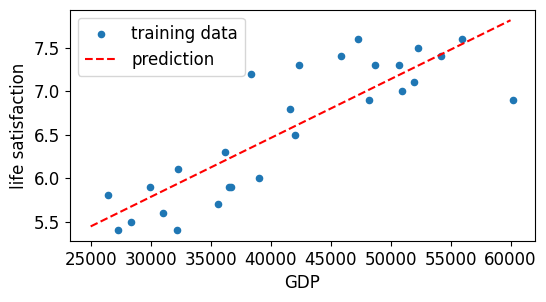

In [5]:
# plot the prediction model f

def f(X, theta):
    return np.matmul(X, theta)

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X, y, s=20, label='training data')

X_test = np.array([25000, 60000])
y_test = f(add_column(X_test), theta)
plt.plot(X_test, y_test, 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP')
plt.ylabel('life satisfaction')
plt.show()

### Linear models for regression
<hr style="border:2px solid gray">

* Given the training data set $\mathcal{D}=\{(\mathbf{x}_n,y_n)\}_{n=1}^N$ and an input vector $\mathbf{x}\in\mathbb{R}^D$, the linear regression model takes the form

$$f(\mathbf{x})=\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_Dx_D=\theta_0+\boldsymbol{\theta}^T\mathbf{x}$$
    
* $\boldsymbol{\theta}\in\mathbb{R}^D$: weights or regression coefficients, $\theta_0$: intercept or bias term

* Compact representation by defining $\mathbf{x}=[\color{red}{x_0=1},x_1,\ldots,x_D]$ and $\boldsymbol{\theta}=[\theta_0,\theta_1,\ldots,\theta_D]$ in $\mathbb{R}^{D+1}$

$$f(\mathbf{x})=\boldsymbol{\theta}^T\mathbf{x}=\langle \boldsymbol{\theta}, \mathbf{x}\rangle$$

### Loss function for linear regression
<hr style="border:2px solid gray">

* MSE loss function for a linear regression model

$$\mathcal{L}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N\big(y_n-\langle \boldsymbol{\theta},\mathbf{x}_n\rangle\big)^2=\frac{1}{N}\|\mathbf{y}-\mathbf{X}\boldsymbol{\theta}\|_2^2$$

where we have

$$\mathbf{X}=\begin{bmatrix}\rule[.5ex]{1em}{0.4pt}\mathbf{x}_1^T \rule[.5ex]{1em}{0.4pt}\\ \vdots\\\rule[.5ex]{1em}{0.4pt}\mathbf{x}_N^T \rule[.5ex]{1em}{0.4pt}\end{bmatrix}\in\mathbb{R}^{N\times (D+1)}, \boldsymbol{\theta}=\begin{bmatrix}
\theta_0\\\theta_1\\ \vdots \\\theta_{D}\end{bmatrix}\in\mathbb{R}^{D+1},\;\mathbf{y}=\begin{bmatrix}y_1\\y_2\\ \vdots\\y_N\end{bmatrix}\in\mathbb{R}^N, $$

* Optimization problem for model fitting/training: $\underset{\boldsymbol{\theta}\in\mathbb{R}^{D+1}}{\operatorname{argmin}} \mathcal{L}(\boldsymbol{\theta})$




### The Normal equation
<hr style="border:2px solid gray">

* To find the value of $\boldsymbol{\theta}$ that minimizes the MSE, there exists a *closed-form* solution
    * a mathematical equation that gives the result directly
    
* The gradient takes the form 

$$\nabla \mathcal{L}(\boldsymbol{\theta})= \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)$$

* Normal equation

$$\boldsymbol{\theta}^*=\big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y}$$

### Sklearn implementation
<hr style="border:2px solid gray">

* Documentation page: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

    * Parameters: Useful for creating objects 
    
    * Attributes: Estimated coefficients, etc.
    
    * Methods: Training, prediction, etc.

In [6]:
# Revisit the GDP data 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X.reshape(-1,1), y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)


3.7490494273769075 [6.77889969e-05]


In [7]:
# Revisit the GDP data by preprocessing input features 

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_minmax = minmax.fit_transform(X.reshape(-1,1))

reg = LinearRegression()

reg.fit(X_minmax, y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)

5.542501428448674 [2.28986761]


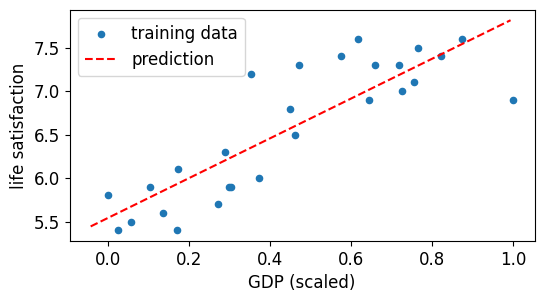

In [8]:
# Plot the prediction model 

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X_minmax, y, s=20, label='training data')

X_test = np.array([25000, 60000]).reshape(-1,1)
X_test_minmax = minmax.transform(X_test)
plt.plot(X_test_minmax, reg.predict(X_test_minmax), 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP (scaled)')
plt.ylabel('life satisfaction')
plt.show()

### Evaluation metrics for regression problems
<hr style="border:2px solid gray">

* The quality of a regression model can be assessed using various quantities
    * See https://scikit-learn.org/stable/modules/model_evaluation.html

* Mean squared error 
$$\text{MSE}(\mathbf{y}, \hat{\mathbf{y}})=\frac{1}{N_{\text{test}}}\sum_{n=1}^{N_{\text{test}}} \big(y_n - \hat{y}_n\big)^2$$

* The value you get after calculating MSE is a squared unit of output
    
* If you have outliers in the data set, then it penalizes the outliers most 
    
* Possible solution: the output value you get is in the same unit as the required output variable

$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}})=\sqrt{\frac{1}{N_{\text{test}}}\sum_{n=1}^{N_{\text{test}}} \big(y_n - \hat{y}_n\big)^2}$$

In [9]:
from sklearn.metrics import mean_squared_error

y_true = [3, -1, 2, 7]
y_pred = [3, 0, 2, 7]

# If True returns MSE value, if False returns RMSE value.
print('MSE: ', mean_squared_error(y_true, y_pred), 
      ', RMSE: ', mean_squared_error(y_true, y_pred, squared=False))

MSE:  0.25 , RMSE:  0.5


### R² score or the coefficient of determination
<hr style="border:2px solid gray">

* Definition 

$$R^2(\mathbf{y}, \hat{\mathbf{y}}) = 1 - \frac{\sum_{n=1}^{N_{\text{test}}} (y_n - \hat{y}_n)^2}{\sum_{n=1}^{N_{\text{test}}} (y_n - \bar{y})^2},\;\;\bar{y} = \frac{1}{N_{\text{test}}} \sum_{n=1}^{N_{\text{test}}} y_n$$

* RSS (Residual Sum of Squares) measures the amount of variability that is left unexplained 

$$\text{RSS}=\sum_{n=1}^{N_{\text{test}}} (y_n - \hat{y}_n)^2$$

* Best possible score is 1 and a number near 0 indicates the model does not explain much of the variability in the response

### Explained variance score
<hr style="border:2px solid gray">

* Definition

$$explained\_{}variance(\mathbf{y}, \hat{\mathbf{y}}) = 1 - \frac{Var\{ \mathbf{y} - \hat{\mathbf{y}}\}}{Var\{\mathbf{y}\}}$$

* The best possible score is 1.0, lower values are worse

* When the prediction residuals have zero mean, the $R^2$ score and the Explained variance score are identical


In [10]:
from sklearn.metrics import r2_score, explained_variance_score
y_true = [3, -1, 2, 7]
y_pred = [2.9, 0, 2.5, 6.5]
r2_score(y_true, y_pred), explained_variance_score(y_true, y_pred)

(0.9538931297709924, 0.9600763358778626)

### Gradient descent (GD)
<hr style="border:2px solid gray">

* Tweak parameters $\boldsymbol{\theta}$ iteratively to minimize the loss function
$\mathcal{L}(\boldsymbol{\theta})$


* At each iteration $t$, perform an update to decrease the loss function

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t \nabla \mathcal{L}(\boldsymbol{\theta}_t)$$

where $\eta_t$ is the step size or learning rate

* If the learning rate is too small, then the algorithm will have to go through many iterations to converge

* The algorithm may diverge when the learning rate is too high 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):  # Objective function
    return x ** 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

def gd(eta, f_grad):
    x = 10.0  # initial solution 
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    return results

In [12]:
def show_trace(results, f):
    
    n = max(abs(min(results)), abs(max(results)))
    f_line = np.arange(-n, n, 0.1)
    plt.plot(f_line, [f(x) for x in f_line], 'r-')
    
    for i in range(0, len(results), 1):
        plt.plot(results[i:i+2], [f(x) for x in results[i:i+2]], 'bo-')
    
    plt.show()

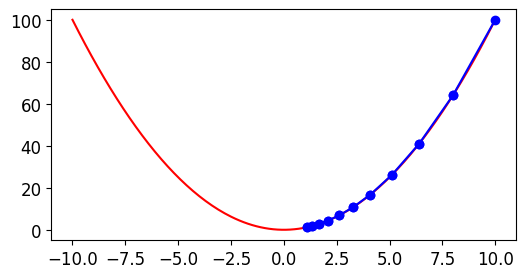

In [13]:
show_trace(gd(.1, f_grad), f)

### Batch GD for linear regression
<hr style="border:2px solid gray">

* Recall the gradient vector of the loss function

$$\nabla \mathcal{L}(\boldsymbol{\theta})= \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta} - \mathbf{y}\big)$$

* GD step with fixed learning rate
$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta \nabla \mathcal{L}(\boldsymbol{\theta}_t)=\boldsymbol{\theta}_t - \eta \frac{2}{N}\mathbf{X}^T\big(\mathbf{X}\boldsymbol{\theta}_t - \mathbf{y}\big) $$

* This formula involves calculations over the full training set $\mathbf{X}$ --> batch or full GD
* An epoch means one complete pass of the training data set 



In [14]:
# GDP data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")

X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

def add_column(X):
    '''
    add the column of all 1's 
    '''
    return np.concatenate(( np.ones((X.shape[0],1)), X.reshape(-1,1)), axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_minmax = minmax.fit_transform(X.reshape(-1,1))

Xcon = add_column(X_minmax)

print(Xcon[:3])

[[1.         0.        ]
 [1.         0.02459182]
 [1.         0.05709406]]


In [16]:
# Implementation of Batch GD 

eta = 0.01  # learning rate
n_epochs = 1000
N = len(Xcon)  # number of instances

np.random.seed(3)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / N * Xcon.T @ (Xcon @ theta - y.reshape(-1,1))
    theta = theta - eta * gradients
    
print(theta)

[[5.54877943]
 [2.27673633]]


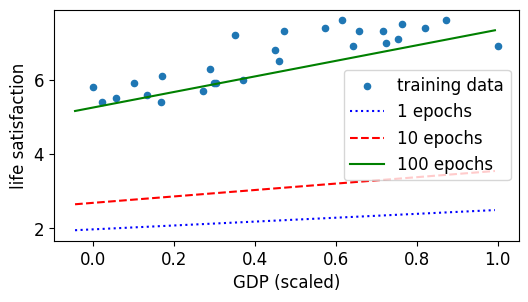

In [17]:
# impact of epoch and eta 
np.random.seed(3)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

X_test = np.array([25000, 60000]).reshape(-1,1)
X_test_minmax = add_column(minmax.transform(X_test))
plt.scatter(X_minmax, y, s=20, label='training data')
eta= .01 # 0.001, 0.01, 0.1, 1
for epoch in range(n_epochs):
    gradients = 2 / N * Xcon.T @ (Xcon @ theta - y.reshape(-1,1))
    theta = theta - eta * gradients
    if epoch == 1: 
        plt.plot(X_test_minmax[:,1], X_test_minmax@theta , 'b:', label='1 epochs')
    elif epoch == 10:
        plt.plot(X_test_minmax[:,1], X_test_minmax@theta , 'r--', label='10 epochs')
    elif epoch == 100:
        plt.plot(X_test_minmax[:,1], X_test_minmax@theta , 'g-', label='100 epochs')           
plt.legend()
plt.xlabel('GDP (scaled)')
plt.ylabel('life satisfaction')
plt.show()

### Stochastic gradient descent (SGD) for linear regression
<hr style="border:2px solid gray">

* The main problem with GD is that it uses the whole training set at every step 
* Consider a minibatch of size $B=1$ and a selected sample $\mathbf{x}_n^T$ from $\mathbf{X}$ (row vector)

$$\nabla \mathcal{L}(\boldsymbol{\theta})=\frac{2}{N}\mathbf{X}^T(\mathbf{X}\boldsymbol{\mathbf{w}}-\mathbf{y}) \Rightarrow 2\mathbf{x}_n(\mathbf{x}_n^T\boldsymbol{\theta}-y_n)$$

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - 2\mathbf{x}_n(\mathbf{x}_n^T\boldsymbol{\theta}-y_n)$$

* Given that $N$ is the sample size and $B$ is the batch size, in one epoch we update our model $N/B$ times
  

In [18]:
n_epochs = 5
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(N):
        random_index = np.random.randint(N)
        xi = np.transpose(Xcon[random_index : random_index + 1])
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi @ (xi.T @ theta - yi)  # for SGD, do not divide by N
        eta = learning_schedule(epoch * N + iteration)
        theta = theta - eta * gradients
        
print(theta)

[[5.56898107]
 [2.27782555]]


### Sklearn implementation of SGD for linear regression
<hr style="border:2px solid gray">

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

* Parameters
    * max_iter: epochs
    * learning_rate: constant or variable
    * n_iter_no_change: number of iterations with no improvement to wait before stopping fitting

In [19]:
# GDP data 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

X = df['GDP per capita (USD)'].to_numpy().reshape(-1,1)
y = df['Life satisfaction'].to_numpy()

pipe = Pipeline([('preprocess', MinMaxScaler()), 
                 ('reg', SGDRegressor(random_state=42))])

pipe.fit(X, y)

print(pipe['reg'].intercept_, pipe['reg'].coef_)


[5.35324059] [2.47088247]


### Polynomial regression 
<hr style="border:2px solid gray">

* The linear model may not be a good fit for many problems 
    * We can improve the fit by using a polynomial regression model of degree $d$

$$f(x)=\boldsymbol{\theta}^T\phi(x)$$

where $\phi(x)=[1,x,x^2,\ldots,x^d]$

* This is a simple example of feature preprocessing/engineering
    * Benefit: linear function of parameters but nonlinear wrt input features

* We can use [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to generate polynomial features
    * Use pipeline in sklearn to assemble several steps (preprocessing + estimator)



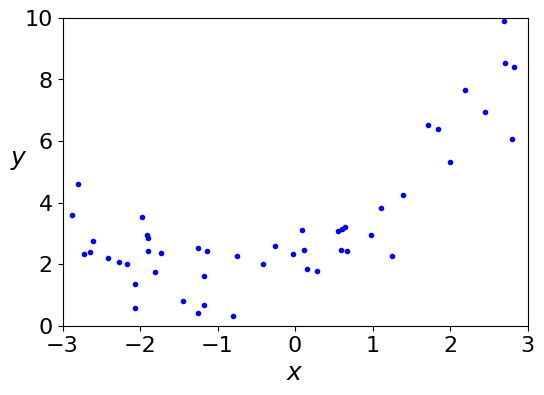

In [20]:
# generate simulated data 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams.update({'font.size': 16, "figure.figsize": (6,4)})

N = 50
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

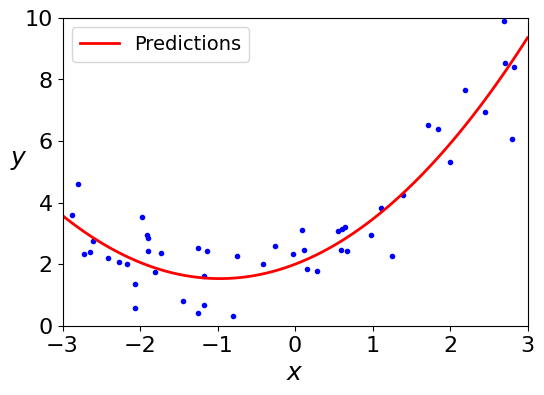

In [21]:
# train polynomial model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regr', LinearRegression())])
pipe.fit(X, y) # training 
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = pipe.predict(X_new) # prediction

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

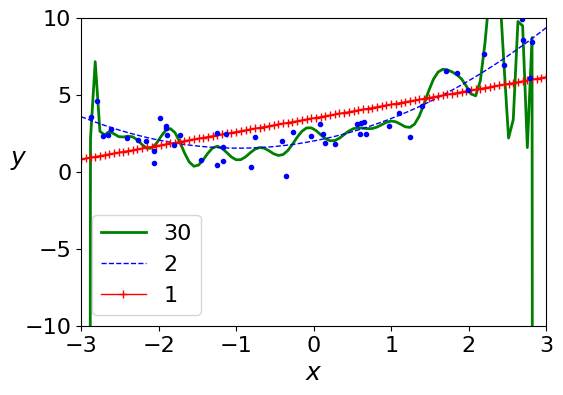

In [22]:
# Compare varying complexity levels 
from sklearn.preprocessing import StandardScaler
for style, width, degree in (("g-", 2, 30), ("b--", 1, 2), ("r-+", 1, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", polybig_features),
                                      ("std_scaler", std_scaler),
                                      ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -10, 10])
plt.show()

### The bias-variance tradeoff
<hr style="border:2px solid gray">

* A model’s generalization/test error can be expressed as the sum of 
    * Bias due to wrong assumptions
        * A high-bias model is likely to underfit the data
    
    * Variance due to excessive sensitivity to small variations in the training data
        * A high-variance model is likely to overfit the data
    
    * Irreducible error due to noisiness of the data itself
    
* As model flexibility increases, training error decreases, but there is a U-shape in test error

<img src="tradeoff.png" height=400 width=600>

### Regularization
<hr style="border:2px solid gray">


* Regularization is a way to avoid overfitting by shrinking or simplifying the model  
    
    $$\mathcal{L}(\boldsymbol{\theta})=\|\mathbf{y}-\mathbf{X}\boldsymbol{\theta}\|_2^2+\lambda C(\boldsymbol{\theta})$$
    
    
* $\lambda\geq 0$ is the regularization parameter (i.e., hyperparameter) and $C(\boldsymbol{\theta})$ is some form of model complexity
* We can quantify complexity using the $\ell_2$ regularization formula, i.e., the sum of the squares of all weights

$$\ell_2 \text{ regularization}=\|\boldsymbol{\theta}\|_2^2=\theta_0^2+\theta_1^2+\theta_2^2+\ldots$$


### $\ell_1$ regularization or LASSO

<hr style="border:2px solid gray">

* LASSO: Least Absolute Shrinkage and Selection Operator 
    * Uses the $\ell_1$ norm of weights, instead of $\ell_2$
    
    $$\|\boldsymbol{\theta}\|_1=|\theta_0|+|\theta_1|+|\theta_2|+\ldots$$
          
* Definition of the $\ell_p$ norm for a real number $p\geq 1$

$$\|\boldsymbol{\theta}\|_p=\big(\sum_i |\theta_i|^p\big)^{1/p}$$
* LASSO tends to eliminate the weights of the least important features (i.e., set them to zero)

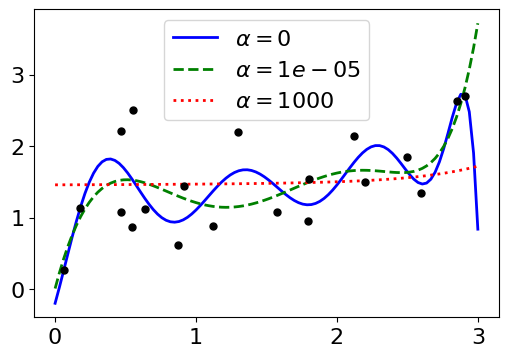

In [23]:
# Synthetic/simulated data (Ridge Regression)
from sklearn.linear_model import Ridge
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

np.random.seed(42)
N = 20
X = 3 * np.random.rand(N, 1)
y = 1 + 0.5 * X + np.random.randn(N, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
alphas=(0, 10**-5, 1000)
for alpha, style in zip(alphas, ("b-", "g--", "r:")): # zip: aggregates them in a tuple
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", Ridge(alpha=alpha)), # alpha = lambda 
                    ])
    model.fit(X, y)
    plt.plot(X_new, model.predict(X_new), style, linewidth=2, label=r"$\alpha = {}$".format(alpha))
plt.plot(X, y, "k.", markersize=10)
plt.legend()
plt.show()

In [24]:
# Lasso 
import numpy as np 
import pandas as pd 

# “Hitters” with 20 variables and 322 observations of major league players
df = pd.read_csv('Hitters.csv', index_col=[0])

# drop missing cases
df = df.dropna()

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [25]:
# Preprocessing, encode our categorical features as one-hot numeric features 

dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])

dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [26]:
# Find outputs 

y = df['Salary']

y.shape

(263,)

In [27]:
# drop the "Salary" column  and categorical columns 

df_input = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)


# Create all features
X = pd.concat([df_input, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1).to_numpy()

X.shape

(263, 19)

In [28]:
# Split the data set into train and test set 70/30 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # 15

In [29]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(184, 19) (184,) (79, 19) (79,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

a = scaler.fit_transform(X_train[:,0:16])

b = scaler.transform(X_test[:,0:16])

X_train = np.concatenate((a, X_train[:,16:]), axis=1)

X_test = np.concatenate((b, X_test[:,16:]), axis=1)

X_train

array([[0.6445774631698904, 0.2574385178054839, -0.4569625523971598, ...,
        True, True, True],
       [-0.5928068888125954, -0.671359271924105, -0.5729364967296804,
        ..., False, False, False],
       [-0.41307508349670363, -0.10501915623533128, -0.688910441062201,
        ..., False, False, False],
       ...,
       [1.4741088723201603, 1.2541971214177257, 1.746542389920731, ...,
        False, True, False],
       [-1.4707276301632977, -1.3962746200057354, -1.1528062183922834,
        ..., False, True, False],
       [-1.6435466737362705, -1.554849852398592, -1.1528062183922834,
        ..., False, True, True]], dtype=object)

In [31]:
from sklearn.linear_model import Lasso

alphas = np.arange(10, 205, 10)

lasso = Lasso(max_iter=10000)

coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

In [32]:
coefs[0] 

array([ -0.        , 107.99233268, -10.74015322,   0.        ,
        -0.        ,  51.9262468 ,  -0.        ,   0.        ,
         0.        ,   0.        , 111.27957791, 127.7453278 ,
        -5.67548846,  56.46682849,  -3.1572202 ,  -0.        ,
        11.91989065, -83.01195905,   0.        ])

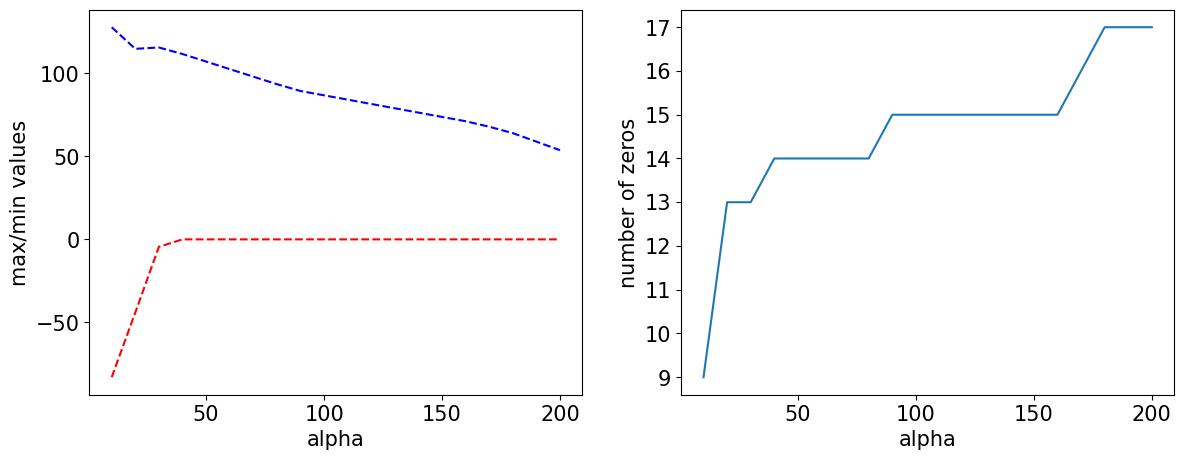

In [33]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15, "figure.figsize": (14,5)})
max_vals = [item.max() for item in coefs]
min_vals = [item.min() for item in coefs]
zero_vals = [np.sum(item == 0) for item in coefs]
plt.subplot(121)
plt.plot(alphas, max_vals, 'b--')
plt.plot(alphas, min_vals, 'r--')
plt.xlabel('alpha')
plt.ylabel('max/min values')

plt.subplot(122)
plt.plot(alphas, zero_vals)
plt.xlabel('alpha')
plt.ylabel('number of zeros')
plt.show()

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alphas = np.arange(10, 205, 10)

lasso = Lasso(max_iter=10000)

r2_values = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    r2_values.append(r2_score(y_test, lasso.predict(X_test)))
    

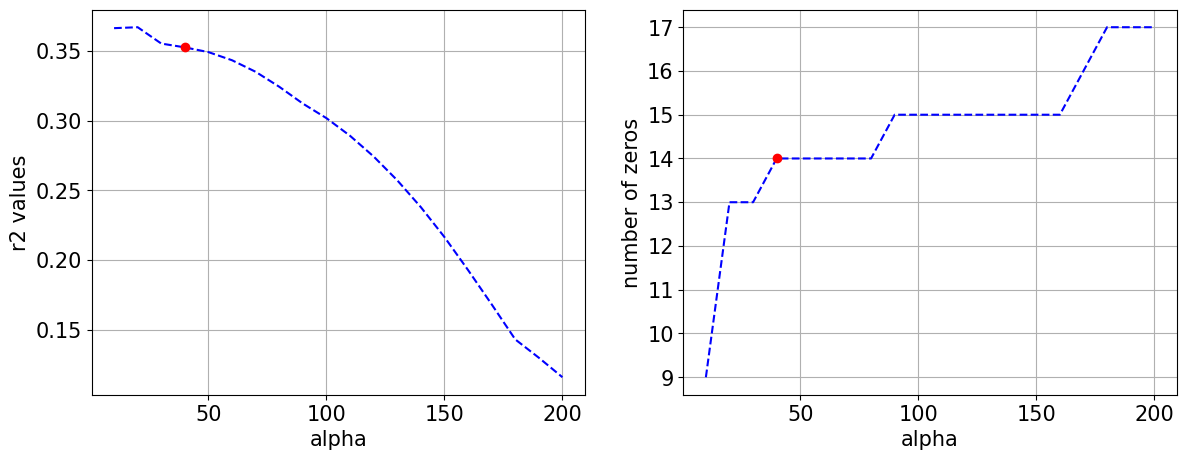

In [35]:
plt.subplot(121)
plt.plot(alphas, r2_values, 'b--')
plt.plot(alphas[3], r2_values[3], 'ro')
plt.xlabel('alpha')
plt.ylabel('r2 values')
plt.grid()

plt.subplot(122)
plt.plot(alphas, zero_vals, 'b--')
plt.plot(alphas[3], zero_vals[3], 'ro')
plt.xlabel('alpha')
plt.ylabel('number of zeros')

plt.grid()
plt.show()

### Logistic regression
<hr style="border:2px solid gray">

* Logistic regression involves a probabilistic model of the form $p(y|\mathbf{x};\boldsymbol{\theta})$, where $\mathbf{x}\in\mathbb{R}^D$ is a fixed-dimensional input vector 
    * $C=2$: binary logistic regression $\rightarrow y\in\{0,1\}$ 
    * $C>2$: multinomial/multiclass logistic regression $\rightarrow y\in\{1,2,\ldots,C\}$
    
* Recall the pmf of the Bernoulli distribution 
$$Ber(y|\theta)=\begin{cases}\theta &\text{ if } y=1\\1-\theta &\text{ if } y=0\end{cases}=\theta^y(1-\theta)^{1-y}$$

* Binary logistic regression

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\color{red}{\sigma(f(\mathbf{x};\boldsymbol{\theta}))})$$

where the sigmoid or logistic function is defined as $\sigma(a):=\frac{1}{1+\exp(-a)}$

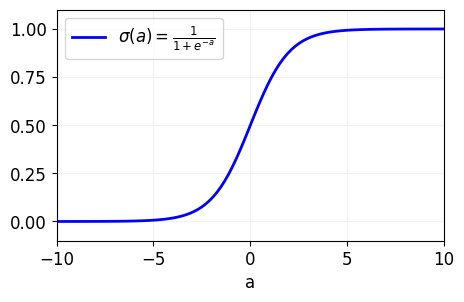

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.xlabel("a")
plt.legend(loc="upper left")
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.95')
plt.show()

### Properties of sigmoid function
<hr style="border:2px solid gray">

* The derivative of $\sigma(a)$ has a nice form

$$\begin{align}\sigma(a)&=\frac{1}{1+e^{-a}}=(1+e^{-a})^{-1}\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(1+e^{-a})'\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(-e^{-a})\\
\frac{d}{da}\sigma(a)&=\frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}}=\sigma(a)(1-\sigma(a))
\end{align}$$


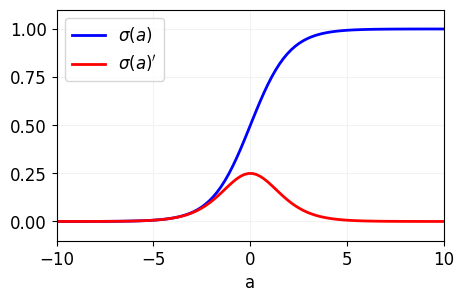

In [37]:
a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) $")
plt.plot(a, sig*(1-sig), "r-", linewidth=2, label=r"$\sigma(a)'$")
plt.xlabel("a")
plt.legend(loc="upper left")
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.95')
plt.show()

### Binary classification
<hr style="border:2px solid gray">

* Plugging the definition of the sigmoid function

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(a)=\frac{1}{1+e^{-a}}=\frac{e^a}{1+e^a}$$
$$p(y=0|\mathbf{x};\boldsymbol{\theta})=1-\sigma(a)=\frac{e^{-a}}{1+e^{-a}}=\frac{1}{1+e^a}$$

* The quantity $a$ is known as the log-odds or logit

$$\log\Big(\frac{p(y=1|\mathbf{x};\boldsymbol{\theta})}{p(y=0|\mathbf{x};\boldsymbol{\theta})}\Big)=\log\Big(e^a\Big)=a$$

* The inverse of the sigmoid function is called the *logit function*

$$\sigma^{-1}(p)=\log\big(\frac{p}{1-p}\big):=\text{logit}(p)$$

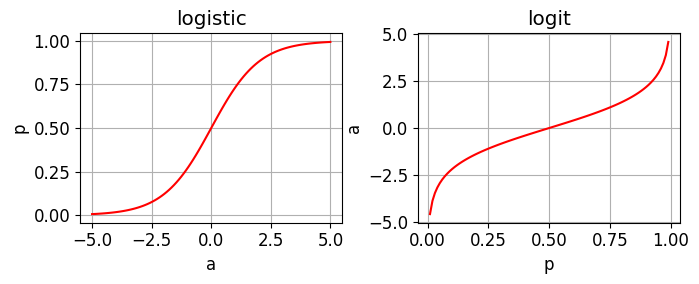

In [38]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(7,3))

# expit 
x = np.linspace(-5, 5, 100)
ax[0].plot(x, expit(x), 'r')
ax[0].set_xlabel('a')
ax[0].set_ylabel('p')
ax[0].grid()
ax[0].set_title('logistic')

# logit 
x = np.linspace(0, 1, 100)
ax[1].plot(x, logit(x), 'r')
ax[1].set_xlabel('p')
ax[1].set_ylabel('a')
ax[1].grid()
ax[1].set_title('logit')

plt.tight_layout()
plt.show()

### Linear model for binary logistic regression
<hr style="border:2px solid gray">

* Use a linear function of the form $f(\mathbf{x};\boldsymbol{\theta})=\boldsymbol{\theta}^T\mathbf{x}$, yielding the following pmf

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\sigma(\boldsymbol{\theta}^T\mathbf{x}))$$

* Thus, we get 

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(\boldsymbol{\theta}^T\mathbf{x})=\frac{1}{1+\exp(-\boldsymbol{\theta}^T\mathbf{x})}$$

* Although sigmoid is a nonlinear function, we have a *linear* classifier

* The optimal decision rule to predict $y=1$

$$p(y=1|\mathbf{x})>p(y=0|\mathbf{x})\rightarrow \log \frac{p(y=1|\mathbf{x})}{p(y=0|\mathbf{x})}>0 \rightarrow \boldsymbol{\theta}^T\mathbf{x}>0$$



### Loss function
<hr style="border:2px solid gray">

* Logistic regression model estimates probabilities and makes predictions. But how is it trained?

* Let us define $\mu_n=\sigma(a_n)$ and $a_n=\boldsymbol{\theta}^T\mathbf{x}_n$

$$l(y_n,\mu_n)=\text{H}_{ce}(y_n,\mu_n)=\begin{cases}-\log(\mu_n) & \text{ if } y_n=1 \\ -\log(1-\mu_n) &\text{ if } y_n=0\end{cases}$$

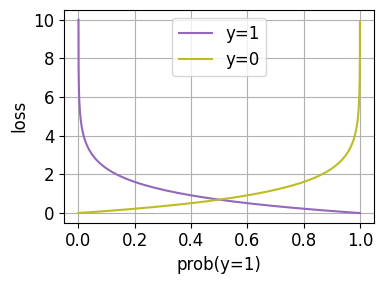

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.special import expit

def cross_entropy_loss(y, mu):
    if y == 1:
        return -np.log(mu)
    else:
        return -np.log(1 - mu)

z = np.arange(-10, 10, 0.1)
mu_z = expit(z)

cost_1 = cross_entropy_loss(1, mu_z) # when y = 1
cost_0 = cross_entropy_loss(0, mu_z) # when y = 0 

fig, ax = plt.subplots(figsize=(4,3))
plt.plot(mu_z, cost_1, 'C4-', label='y=1')
plt.plot(mu_z, cost_0, 'C8-', label='y=0')
plt.xlabel('prob(y=1)')
plt.ylabel('loss')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### Loss function

<hr style="border:2px solid gray">

* The loss function over the whole training set is the average loss over all training samples

$$\mathcal{l}(\boldsymbol{\theta})=-\frac{1}{N}\sum_{n=1}^N \big[y_n\log \mu_n + (1-y_n) \log(1-\mu_n)\big]$$

* Can we compute the gradient? Recall the data matrix $\mathbf{X}\in\mathbb{R}^{N\times D}$ and target vector $\mathbf{y}\in\mathbb{R}^N$

$$\nabla l(\boldsymbol{\theta})=\frac{1}{N}\mathbf{X}^T\Big(\sigma\big(\mathbf{X}\boldsymbol{\theta}\big)-\mathbf{y}\Big)$$


* Thus, partial derivatives can be written as 

$$\frac{\partial}{\partial \theta_j}\mathcal{l}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N x_{n,j}\Big(\sigma\big(\mathbf{x}_n^T\boldsymbol{\theta}\big)-y_n\Big)$$


In [40]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

list(iris)


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [41]:
iris['data'] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
iris['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [43]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

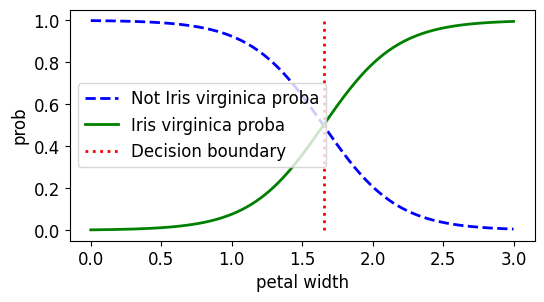

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(6, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "r:", linewidth=2,
         label="Decision boundary")
plt.xlabel('petal width')
plt.ylabel('prob')
plt.legend()
plt.show()

In [46]:
log_reg.predict_proba(X_test[:5])

array([[0.84931999, 0.15068001],
       [0.9944147 , 0.0055853 ],
       [0.07651009, 0.92348991],
       [0.64069097, 0.35930903],
       [0.72352248, 0.27647752]])

In [47]:
log_reg.predict(X_test[:5])

array([False, False,  True, False, False])

### Multinomial logistic regression
<hr style="border:2px solid gray">

* To represent a distribution over a finite set of labels, $y\in\{1,\ldots,C\}$, we can use the categorical distribution, which generalizes the Bernoulli to $C>2$ values

$$\text{Cat}(y|\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{I(y=c)}$$

where $\boldsymbol{\theta}=[\theta_1,\ldots,\theta_C]$, $0\leq \theta_c\leq 1$, and $\sum_{c=1}^C\theta_c=1$

* A classification model of the following form 

$$\begin{align}p(y|\mathbf{x};\boldsymbol{\theta})&=\text{Cat}\big(y|f(\mathbf{x};\boldsymbol{\theta})\big)\\&= \text{Cat}\big(y|\text{softmax}(\mathbf{W}\mathbf{x})\big)\end{align}$$

where $\mathbf{W}\in\mathbb{R}^{C\times D}$

* Let $\mathbf{a}=\mathbf{W}\mathbf{x}\in\mathbb{R}^C$ be the vector of logits

$$p(y=c|\mathbf{x};\boldsymbol{\theta})=\frac{e^{a_c}}{\sum_{c'=1}^Ce^{a_{c'}}}$$

* The definition of cross-entropy between two probabilities 

$$\text{H}_{ce}(\mathbf{p},\mathbf{q})=-\sum_{c=1}^Cp_c\log q_c$$


In [48]:
def stable_softmax(x):
    z = x - max(x)
    numerator = np.exp(z)
    denominator = np.sum(numerator)
    softmax = numerator/denominator
    return softmax 

print(stable_softmax(np.array([1, -2, 3])))
    

[0.11849965 0.00589975 0.8756006 ]


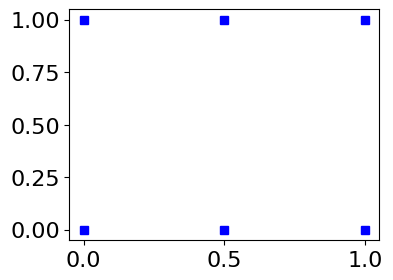

In [49]:
# create a 2D grid 

import numpy as np 
import matplotlib.pyplot as plt

# How to create a 2D grid/mesh? 
nx, ny = (3,2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors

X_grid = np.c_[xv.ravel(), yv.ravel()]
plt.rcParams.update({'font.size': 16, "figure.figsize": (4,3)})
plt.plot(X_grid[:, 0], X_grid[:, 1], "bs")
plt.show()


In [50]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs",  random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

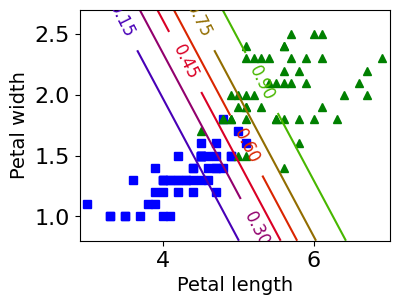

In [51]:
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.rcParams.update({'font.size': 16, "figure.figsize": (7,4)})
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()